**Nama : Fauzan Ahsanudin Alfikri**

**NIM : 103052300003**

**Tugas Machine Learning EDA**


##**IMPORT DATA**

In [2]:
!pip install kaggle

In [3]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Define the dataset and the directory to download it to
dataset = 'kapturovalexander/nvidia-amd-intel-asus-msi-share-prices'
download_dir = './kaggle_datasets'

# Create the download directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the dataset
api.dataset_download_files(dataset, path=download_dir, unzip=True)

print(f"Dataset downloaded and unzipped to {download_dir}")

Dataset URL: https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices
Dataset downloaded and unzipped to ./kaggle_datasets


##**EDA**

In [4]:
df = pd.read_csv('/content/kaggle_datasets/AMD (2023 - 08.04.2024).csv')

In [5]:
print("========== SAMPEL DATA ==========")
print(df.head())

print("\n========== INFO DATA ==========")
print(df.info())

print("\n========== STATISTIK DESKRIPTIF ==========")
print(df.describe(include='all'))

print("\n========== MISSING VALUES ==========")
print(df.isnull().sum())

========== SAMPEL DATA ==========
         Date       Open       High        Low      Close  Adj Close    Volume
0  2023-01-03  66.000000  66.879997  63.590000  64.019997  64.019997  46851800
1  2023-01-04  65.000000  65.790001  63.310001  64.660004  64.660004  47477100
2  2023-01-05  64.150002  64.349998  62.299999  62.330002  62.330002  46159500
3  2023-01-06  63.150002  64.300003  60.049999  63.959999  63.959999  70161300
4  2023-01-09  66.220001  69.320000  65.669998  67.239998  67.239998  69741300

========== INFO DATA ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       316 non-null    object 
 1   Open       316 non-null    float64
 2   High       316 non-null    float64
 3   Low        316 non-null    float64
 4   Close      316 non-null    float64
 5   Adj Close  316 non-null    float64
 6   Volume     316 non-null    int

###PENGISIAN NILAI NULL

In [6]:
# Mengisi nilai null dengan data dari baris di sekitarnya, apabila ada null
# Menggunakan forward fill
df.fillna(method='ffill', inplace=True)

<ipython-input-6-e7066f9a9c60>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
# Memverifikasi bahwa tidak ada lagi nilai null
print("\nNilai null setelah menangani data yang hilang:")
print(df.isnull().sum())


Nilai null setelah menangani data yang hilang:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Dilakukan Apabila Ada Nilai NULL

###Visualisasi

In [8]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()

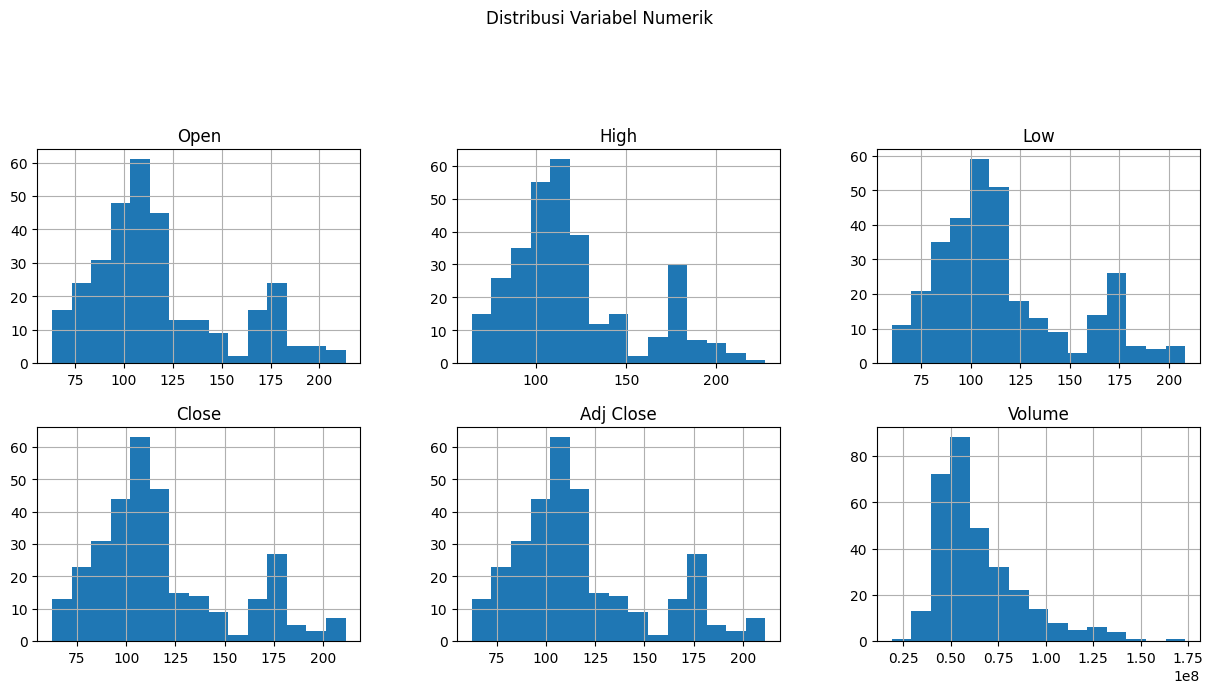

In [9]:
# Histogram untuk semua variabel numerik
df[numerical].hist(bins=15, figsize=(15,10), layout=(3,3))
plt.suptitle('Distribusi Variabel Numerik', y=1.02)
plt.show()

**Insight Yang didapatkan:**


*   Open, High, Low, Close, Adj Close: Semua variabel harga menunjukkan distribusi yang mirip, dengan puncak di sekitar nilai tengah. Ini menunjukkan bahwa harga-harga tersebut cenderung terdistribusi normal.
*   Volume: Distribusi volume menunjukkan skewness, dengan banyak nilai rendah dan beberapa nilai tinggi, yang menunjukkan adanya beberapa hari dengan volume perdagangan yang sangat tinggi.



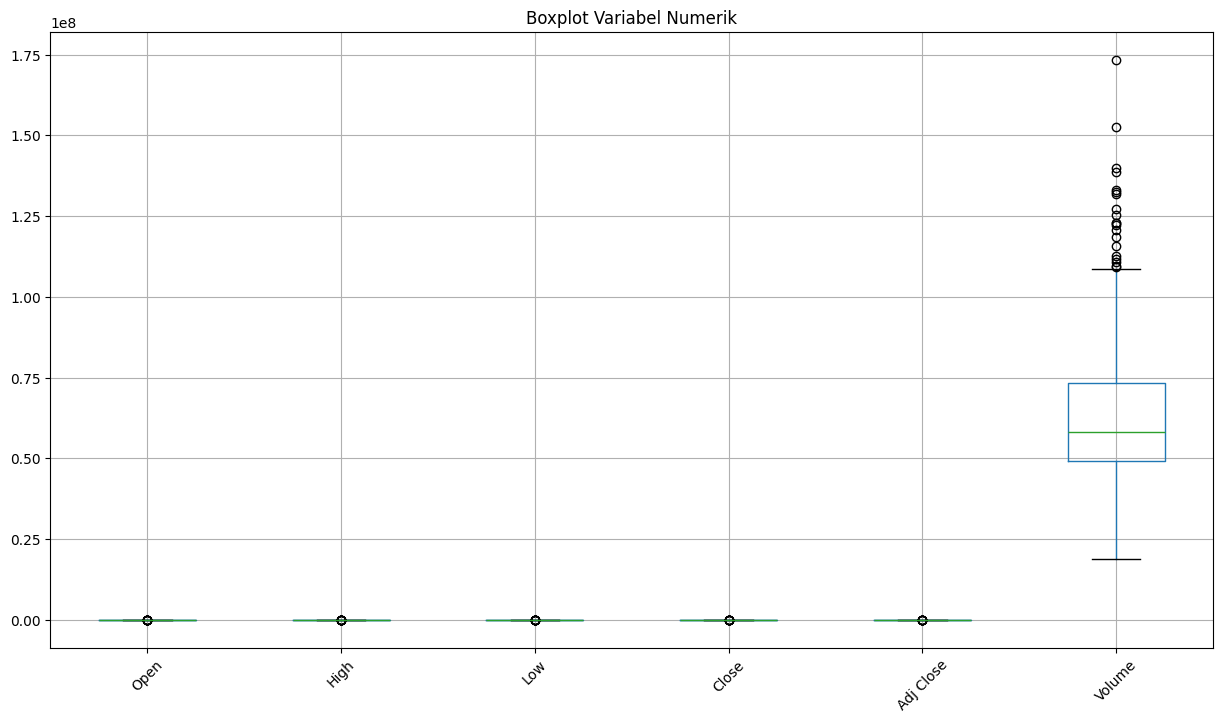

In [10]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15,8))
df[numerical].boxplot()
plt.title('Boxplot Variabel Numerik')
plt.xticks(rotation=45)
plt.show()

**Insight Yang Didapatkan:**


*   Boxplot menunjukkan adanya outlier pada variabel Volume. Ini menunjukkan bahwa ada beberapa hari di mana volume perdagangan sangat tinggi dibandingkan dengan hari-hari lainnya. Hal ini bisa menjadi titik perhatian untuk analisis lebih lanjut, karena outlier dapat mempengaruhi analisis dan model yang dibangun.
*   Variabel harga lainnya (Open, High, Low, Close, Adj Close) tidak menunjukkan outlier yang signifikan, yang menunjukkan bahwa data harga lebih konsisten.



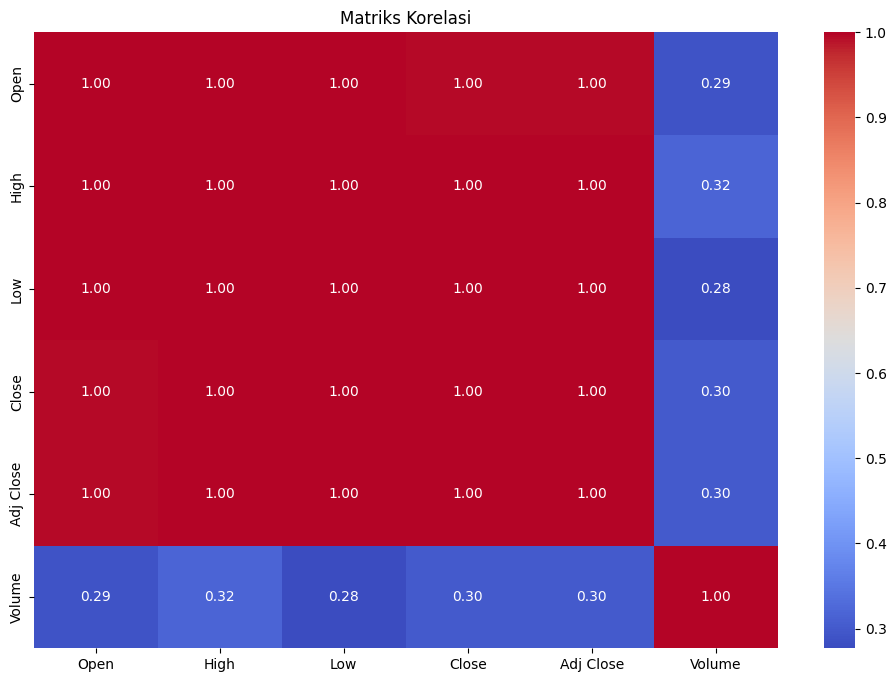

In [11]:
# Analisis Korelasi
plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

**Insight yang didapatkan:**

*   Variabel harga (Open, High, Low, Close, Adj Close) menunjukkan korelasi positif yang kuat satu sama lain, dengan nilai korelasi di atas 0.28. Ini menunjukkan bahwa ketika satu variabel meningkat, variabel lainnya cenderung meningkat juga.
*   Volume memiliki korelasi yang lebih rendah dengan variabel harga, dengan nilai korelasi berkisar antara 0.29 hingga 0.32. Ini menunjukkan bahwa volume perdagangan tidak selalu berhubungan langsung dengan harga.

In [12]:
# Analisis Outlier
for col in numerical:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[abs(z_scores) > 3]
    if not outliers.empty:
        print(f'\nOutlier di {col}:')
        print(outliers[[col]])


Outlier di High:
           High
296  227.300003

Outlier di Volume:
        Volume
20   152548200
145  173372000
209  138641500
262  139825500


###Kesimpulan EDA

In [13]:
print("\n========== KESIMPULAN EDA ==========")
print("1. Dimensi Data:", df.shape)
print("2. Total Missing Values:", df.isnull().sum().sum())
print("3. Korelasi Tertinggi:", corr_matrix.unstack().sort_values().drop_duplicates().tail(3))
print("4. Jumlah Kolom Numerik:", len(numerical))


========== KESIMPULAN EDA ==========
1. Dimensi Data: (316, 7)
2. Total Missing Values: 0
3. Korelasi Tertinggi: Open  Low          0.998224
Low   Adj Close    0.998421
Open  Open         1.000000
dtype: float64
4. Jumlah Kolom Numerik: 6
